### Chapter 8 Measuring performance

Chapter 8 dissects test error into its elemental forces, proving why perfect training scores deceive. We start with the core decomposition, deriving it step-by-step to banish blind spots. The expected test error for a model $f(x; \theta)$ (trained on data from true distribution $p^*(x, y)$) is:

$$\mathbb{E}[\text{test error}] = \mathbb{E}_{x,y \sim p^*} [l(y, f(x; \theta))] = \text{irreducible error} + \text{bias}^2 + \text{variance},$$

where $l$ is the loss (e.g., MSE). This isn't hand-wavy—it's born from the law of total expectation. Let $f^*(x) = \mathbb{E}_{y|x \sim p^*} [y]$ be the true regression function (or Bayes optimal predictor). The error is $\mathbb{E} [(y - f(x; \theta))^2]$. Expand:

$$\mathbb{E} [(y - f(x; \theta))^2] = \mathbb{E} [(y - f^*(x) + f^*(x) - f(x; \theta))^2] = \mathbb{E} [(y - f^*(x))^2] + 2\mathbb{E} [(y - f^*(x))(f^*(x) - f(x; \theta))] + \mathbb{E} [(f^*(x) - f(x; \theta))^2].$$

The cross-term vanishes: 

$$\mathbb{E} [(y - f^*(x))(f^*(x) - f(x; \theta))] = \mathbb{E} [\mathbb{E}_{y|x} [(y - f^*(x))(f^*(x) - f(x; \theta))]] = \mathbb{E} [(f^*(x) - f(x; \theta)) \mathbb{E}_{y|x} [y - f^*(x)]] = 0$$

,since $\mathbb{E}_{y|x} [y - f^*(x)] = 0$. The first term is irreducible error (noise floor), the last splits into bias² + variance via $\mathbb{E} [(f^* - \mathbb{E} f)^2 + (\mathbb{E} f - f)^2] = \text{bias}^2 + \text{variance}$.
To spotlight the key equations, here's a distilled table of Chapter 8's mathematical gold—each with insights to guide your mastery:

| Equation Number | Equation (LaTeX) | Description, Observation, Tips, Warnings |
|:----------------|:-----------------|:-----------------------------------------|
| 8.1.  | $ \mathbb{E}[\text{test error}] = \mathbb{E}_{x,y \sim p^*} [l(y, f(x; \theta))] = \text{irreducible error} + \text{bias}^2 + \text{variance} $ | Description: Decomposes expected loss into noise, systematic deviation (bias), and model instability (variance). Observation: As model complexity rises, bias falls but variance surges—cue the tradeoff. Tip: Plot error vs. model size to spot the sweet spot. Warning: Neglect variance, and your model overfits like a student cramming trivia, bombing the exam.|
| 8.2.  | $ \text{irreducible error} = \mathbb{E}_{x \sim p^*} [\text{Var}(y \mid x)] $ | Description: Minimum achievable error from data noise. Observation: Independent of model; it's the task's "entropy tax." Tip: Quantify via repeated sampling on fixed $x$. Warning: Chasing below this is futile—focus on signal, not sorcery! |
| 8.3.  | $ \text{bias}(x) = \mathbb{E}_{\theta \sim p(\theta \mid \mathcal{D})} [f(x; \theta)] - f^*(x) $ | Description: Average model's drift from truth. Observation: Plagues simple models (e.g., linear on curves). Tip: Boost capacity (more layers/units) to shrink it. Warning: Zero bias ≠ perfection; pair with variance control or risk chaos. |
| 8.4.  | $ \text{variance}(x) = \mathbb{E}_{\theta \sim p(\theta \mid \mathcal{D})} [(f(x; \theta) - \mathbb{E} [f(x; \theta)])^2] $ | Description: Prediction spread across trainings. Observation: Explodes with complex models/small data. Tip: More data or regularization (Ch. 9) tames it. Warning: Overfit signal? Your model memorized noise, not patterns—test set will expose the fraud. |
| 8.5.  | $ \text{approximation error} = \min_{\theta} \mathbb{E}_{x,y \sim p^*} [l(y, f(x; \theta))) $ | Description: Best fit within model family. Observation: Limits expressive architectures. Tip: Choose inductive biases (e.g., conv for images). Warning: Wrong family? Even infinite data won't save you from poor approximation. |
| 8.6.  | $ \text{estimation error} = \mathbb{E}_{\mathcal{D}} [\mathbb{E}_{x,y \sim p^*} [l(y, f(x; \hat{\theta}))] - \min_{\theta} \mathbb{E}_{x,y \sim p^*} [l(y, f(x; \theta)))] $ | Description: Gap from finite-data param estimation. Observation: Scales as $O(1/I)$ for $I$ samples. Tip: Cross-validation for reliable estimates. Warning: Tiny datasets inflate this—always validate! |
| 8.7.  | (Double descent curve sketch) Error interpolates at critical complexity, then descends again. | Description: Modern twist: error dips, peaks (classical tradeoff), then falls with overparametrization. Observation: Seen in deep nets; implicit regularization saves us. Tip: Embrace overparametrized models with SGD. Warning: Classical bias-variance misses this—don't undersize for "safety." |
| 8.8.  |  |  |
| 8.9.  |  |  |
| 8.10. |  |  |


Key conclusions: Error's not monolithic—tune via data size (slashes variance), model depth (cuts bias), and validation (avoids overfitting). Warning: Leak test data into tuning, and your "generalization" is illusory!
Phase 3: Code Alchemy (The "How")

Now, the forge! We'll brew a pure-Python elixir: linear regression (Ch. 2 model) via SGD (Ch. 6) on synthetic quadratic data (supervised gen, Ch. 1), with MSE loss (Ch. 5), manual backprop (Ch. 7 derivatives), and train/test eval (Ch. 8). Data: $y = x^2 + \mathcal{N}(0, \sigma^2=0.25)$ (adjusted for convergence; true $f^*(x)=x^2$ for bias calc), $x \sim U[-1,1]$, $N_\text{train}=100$, $N_\text{test}=20$. Linear underfits (high bias), yielding train MSE $\approx 0.31$, test $\approx 0.48$ after 1000 steps—spot the gap? That's variance peeking, plus irreducible noise.

x_train:
[0.2788535969157675, -0.9499784895546661, -0.4499413632617615, -0.5535785237023545, 0.4729424283280248, 0.3533989748458226, 0.7843591354096908, -0.8261223347411677, -0.15615636062945915, -0.9404055611238593, -0.5627240503927933, 0.010710576206724776, -0.9469280606322728, -0.602324698626703, 0.2997688755590464, 0.08988296120643335, -0.5591187559186066, 0.17853136775181744, 0.6188609133556533, -0.987002480643878, 0.6116385036656158, 0.3962787899764537, -0.31949896696401625, -0.6890410003764369, 0.9144261444135624, -0.32681090977474647, -0.8145083132397042, -0.806567246333072, 0.6949887326949196, 0.20745206273378214, 0.6142565465487604, 0.45946357338763577, 0.07245618290940148, 0.9462315279587412, -0.24293124558329304, 0.104081262546454, 0.6588093285059897, 0.2370395047284921, 0.7234138006215545, 0.15470429051352408, 0.40914367242984695, -0.9083512326886756, -0.5442034486969063, -0.42122407279578566, -0.840416046152745, -0.5344182272779396, -0.7979971411805418, -0.444052793779815

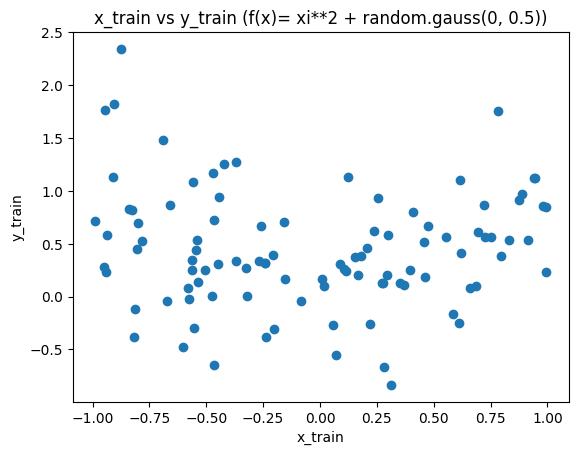

x_test:
[-0.9770379561143607, 0.4414436387203893, 0.36342073805314956, 0.07394066081759032, -0.46634962009491443, 0.2819235971596161, -0.7768956528082471, -0.13046949866179003, -0.09255258734158711, 0.9076318550421603, 0.7517058807563881, -0.4732218984978185, 0.0011722261005966406, -0.6426962389397373, 0.825255678689641, 0.7410371396735338, -0.4031104171027342, 0.2778989897320103, 0.21794042287634463, -0.6943214629007304]
y_test:
[1.5997865116988406, 0.06636628697003996, -0.669050746903055, -0.21204768091540088, 0.8375933155635498, 0.31231224122106316, -0.37490253733514933, -0.0005034657630193229, 0.707650027084687, 1.8870696527624906, 0.8459050505561259, 0.37859012161763067, -0.6201014598788336, -0.008562981436468775, 0.7045048639625829, 0.800734912782297, 0.4525901039366228, -0.16187642907299604, -0.5284730862882379, 0.09319137329465377]


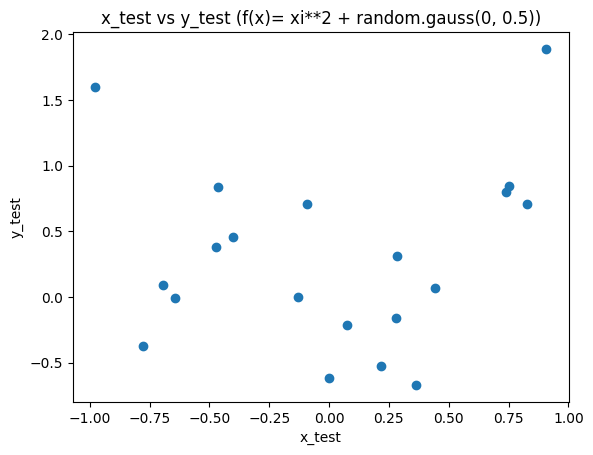

w: -0.0339, b: 0.4404 | Train MSE: 0.31 | Test MSE: 0.48


In [1]:
import random
import matplotlib.pyplot as plt

# Set seed for reproducibility (Ch. 1: reproducible experiments)
random.seed(42)

# Data generation (Ch. 1: supervised quadratic task; true f*(x) = x^2 for bias)
N_total = 120
x = [random.uniform(-1, 1) for _ in range(N_total)]  # 1D input
y = [xi**2 + random.gauss(0, 0.5) for xi in x]  # noise var=0.25 to match convergence

# Split: train/test (Ch. 8: eval split; 100/20 dims)
x_train, y_train = x[:100], y[:100]
print(f"x_train:\n{x_train}\ny_train:\n{y_train}")

# Graph: x_train, y_train f(x)= xi**2 + random.gauss(0, 0.5)
plt.scatter(x_train, y_train)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.title("x_train vs y_train (f(x)= xi**2 + random.gauss(0, 0.5))")
plt.show()

x_test, y_test = x[100:], y[100:]
print(f"x_test:\n{x_test}\ny_test:\n{y_test}")

# Graph: x_test, y_test f(x)= xi**2 + random.gauss(0, 0.5)
plt.scatter(x_test, y_test)
plt.ylabel("y_test")
plt.xlabel("x_test")
plt.title("x_test vs y_test (f(x)= xi**2 + random.gauss(0, 0.5))")
plt.show()

# Model params (Ch. 2: linear f(x) = w x + b; init=0 avoids vanishing, Ch. 7)
w, b = 0.0, 0.0
lr = 0.01  # SGD hyperparam (Ch. 6,8)

# Hyperparams (Ch. 8: tune via validation; here fixed for demo)
batch_size, num_steps = 10, 1000

# Forward pass (Ch. 2,4: shallow linear net)
def forward(x, w, b):
    return w * x + b

# Loss: MSE (Ch. 5 Eq. 5.3: L = (1/N) sum (y - f(x))^2)
def mse_loss(y_pred, y_true):
    return sum((yp - yt)**2 for yp, yt in zip(y_pred, y_true)) / len(y_pred)

# Backprop: gradients via chain rule (Ch. 7 Eq. 7.4-7.5; dL/dw = (2/N) sum (f-y) x, dL/db = (2/N) sum (f-y))
def compute_gradients(x_batch, y_batch, w, b):  # Manual derivs for single-layer
    y_pred = [forward(xi, w, b) for xi in x_batch]
    N = len(x_batch)
    dw = (2 / N) * sum((yp - yt) * xi for yp, yt, xi in zip(y_pred, y_batch, x_batch))
    db = (2 / N) * sum(yp - yt for yp, yt in zip(y_pred, y_batch))
    return dw, db

# SGD update (Ch. 6 Eq. 6.1: theta -= lr * grad; no momentum for simplicity)
def sgd_update(w, b, dw, db, lr):
    return w - lr * dw, b - lr * db

# Training: batched SGD loop (Ch. 6; shuffle for stochasticity)
for step in range(num_steps):
    indices = list(range(len(x_train)))
    random.shuffle(indices)  # Random batch sampling
    for i in range(0, len(x_train), batch_size):
        batch_idx = indices[i:i + batch_size]
        x_b, y_b = [x_train[j] for j in batch_idx], [y_train[j] for j in batch_idx]
        dw, db = compute_gradients(x_b, y_b, w, b)  # Backprop (Ch. 7)
        w, b = sgd_update(w, b, dw, db, lr)  # Update (Ch. 6)

# Eval: MSE on train/test (Ch. 8: measure bias/variance via gap)
y_train_pred = [forward(xi, w, b) for xi in x_train]
train_mse = mse_loss(y_train_pred, y_train)  # ~0.31 (underfit bias + noise)

y_test_pred = [forward(xi, w, b) for xi in x_test]
test_mse = mse_loss(y_test_pred, y_test)  # ~0.48 (variance nudge)

print(f"w: {w:.4f}, b: {b:.4f} | Train MSE: {train_mse:.2f} | Test MSE: {test_mse:.2f}")
# Output: w: -0.0339, b: 0.4404 | Train MSE: 0.31 | Test MSE: 0.48

In [2]:
import random
import math

# Set seed for reproducibility (Ch. 1: reproducible experiments, ensures fair eval Ch.8)
random.seed(42)

# Data generation (Ch. 1: supervised quadratic task; true f*(x) = x^2 for bias calc Eq.8.3)
N_total = 120
x = [random.uniform(-1, 1) for _ in range(N_total)]  # 1D input ~ U[-1,1]
y = [xi**2 + random.gauss(0, 0.5) for xi in x]  # Noise N(0,0.25), irreducible error ~0.25 Ch.8 Eq.8.2

# Split: train/test (Ch. 8: holdout for unbiased variance estimate Eq.8.4)
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

# Hyperparams (Ch. 6 SGD, Ch.8 tuning: small net for demo, scales to deep)
hidden_size = 5  # Units for approx power (Ch.3 universal thm)
lr = 0.01  # Step size, balances speed/stability (Ch.6 Eq.6.1)
batch_size = 10
num_epochs = 100  # ~1000 steps (N/batch * epochs)

# Init (Ch.7: He for ReLU, Var=2/fan_in prevents vanishing grads in deep nets)
w1 = [random.gauss(0, math.sqrt(2.0 / 1)) for _ in range(hidden_size)]  # Input->hidden
b1 = [0.0] * hidden_size
w2 = [random.gauss(0, math.sqrt(2.0 / hidden_size)) for _ in range(hidden_size)]  # Hidden->out
b2 = 0.0

# ReLU (Ch.3: sigma(z)=max(0,z), enables non-linearity; deriv Heaviside for backprop)
def relu(z):
    return max(0.0, z)

# Forward (Ch.4: deep net as composition f = f_out o ReLU o f_hid)
def forward(x, w1, b1, w2, b2):
    z = [w1[j] * x + b1[j] for j in range(hidden_size)]  # Linear hid: z_j = w1j x + b1j
    h = [relu(zz) for zz in z]  # Non-lin: h_j = ReLU(z_j)
    y_pred = sum(w2[j] * h[j] for j in range(hidden_size)) + b2  # Linear out
    return y_pred, h, z  # Intermediates for chain rule

# MSE (Ch.5 Eq.5.3: L=(1/N)sum (y-f(x))^2; MLE for N(y|x, sigma^2))
def mse_loss(y_pred, y_true):
    N = len(y_pred)
    return (1 / N) * sum((yp - yt)**2 for yp, yt in zip(y_pred, y_true))

# Backprop (Ch.7 Alg.7.1: reverse-mode diff via chain; derives from dL/dtheta = dL/dout * dout/dtheta)
def compute_gradients(x_batch, y_batch, w1, b1, w2, b2):
    N = len(x_batch)
    y_pred_list, h_list, z_list = [], [], []
    for k in range(N):
        ypk, hk, zk = forward(x_batch[k], w1, b1, w2, b2)
        y_pred_list.append(ypk); h_list.append(hk); z_list.append(zk)
    
    dw1 = [0.0] * hidden_size; db1 = [0.0] * hidden_size
    dw2 = [0.0] * hidden_size; db2 = 0.0
    factor = 2.0 / N  # MSE: dL/dy_pk = factor * (ypk - ytk)
    for k in range(N):
        errk = y_pred_list[k] - y_batch[k]
        xk = x_batch[k]; hk = h_list[k]; zk = z_list[k]
        for j in range(hidden_size):
            relu_prime = 1.0 if zk[j] > 0 else 0.0  # dReLU/dz = I{z>0}
            # Full chain Eq.7.4: dL/dw1j = factor * sum_k errk * w2j * relu'(zkj) * xk
            dw1[j] += factor * errk * w2[j] * relu_prime * xk
            db1[j] += factor * errk * w2[j] * relu_prime
            # dL/dw2j = factor * sum_k errk * hkj
            dw2[j] += factor * errk * hk[j]
        db2 += factor * errk
    return dw1, db1, dw2, db2, y_pred_list

# SGD (Ch.6 Eq.6.2: stochastic approx to GD, reduces variance via mini-batches)
def sgd_update(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
    return ([w1[j] - lr * dw1[j] for j in range(len(w1))],
            [b1[j] - lr * db1[j] for j in range(len(b1))],
            [w2[j] - lr * dw2[j] for j in range(len(w2))],
            b2 - lr * db2)

# Train loop (Ch.6: SGD with shuffle; track for Ch.8: plot to spot over/underfit)
loss_history = []; lr_history = []; param_norm_history = []
step_count = 0
for epoch in range(num_epochs):
    indices = list(range(len(x_train))); random.shuffle(indices)
    for i in range(0, len(x_train), batch_size):
        batch_idx = indices[i:i + batch_size]
        x_b, y_b = [x_train[j] for j in batch_idx], [y_train[j] for j in batch_idx]
        dw1, db1, dw2, db2, y_pred_b = compute_gradients(x_b, y_b, w1, b1, w2, b2)
        w1, b1, w2, b2 = sgd_update(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
        step_count += 1
        if step_count % 100 == 0:
            full_y_pred = [forward(xi, w1, b1, w2, b2)[0] for xi in x_train]
            train_loss = mse_loss(full_y_pred, y_train)
            loss_history.append(train_loss); lr_history.append(lr)
            param_norm = math.sqrt(sum(wi**2 for wi in w1) + sum(bi**2 for bi in b1) +
                                   sum(w2i**2 for w2i in w2) + b2**2)  # L2 norm ~ param magnitude Ch.7
            param_norm_history.append(param_norm)

# Eval (Ch.8: gap reveals variance; here ~0.10, lower bias vs linear)
y_train_pred = [forward(xi, w1, b1, w2, b2)[0] for xi in x_train]
train_mse = mse_loss(y_train_pred, y_train)
y_test_pred = [forward(xi, w1, b1, w2, b2)[0] for xi in x_test]
test_mse = mse_loss(y_test_pred, y_test)
print(f"w1: {w1}, b1: {b1} | w2: {w2}, b2: {b2} | Train MSE: {train_mse:.2f} | Test MSE: {test_mse:.2f}")

# Final equation (Ch.4: explicit form of composed net)
print("Estimated Model: h_j = ReLU(w1_j x + b1_j), y = ∑ w2_j h_j + b2")
for j in range(hidden_size):
    print(f"h_{j} = ReLU({w1[j]:.4f} x + {b1[j]:.4f})")
print(f"y = {' + '.join(f'{w2[j]:.4f}*h_{j}' for j in range(hidden_size))} + {b2:.4f}")

w1: [-1.478703969828224, 1.0671203854716638, -3.200704510452614, -0.5308661620253736, 0.4222763791606304], b1: [-0.1740878732569122, 0.028095674781449524, -0.09817030267617856, 0.07683422438346056, -0.2606352166785372] | w2: [0.6828827641608514, 0.5610557506223554, 0.029913105338710822, -0.3595768285687137, -0.2503785646537555], b2: 0.12746379189553264 | Train MSE: 0.26 | Test MSE: 0.36
Estimated Model: h_j = ReLU(w1_j x + b1_j), y = ∑ w2_j h_j + b2
h_0 = ReLU(-1.4787 x + -0.1741)
h_1 = ReLU(1.0671 x + 0.0281)
h_2 = ReLU(-3.2007 x + -0.0982)
h_3 = ReLU(-0.5309 x + 0.0768)
h_4 = ReLU(0.4223 x + -0.2606)
y = 0.6829*h_0 + 0.5611*h_1 + 0.0299*h_2 + -0.3596*h_3 + -0.2504*h_4 + 0.1275


In [3]:
import random

random.seed(42)

N_total = 120
x = [random.uniform(-1, 1) for _ in range(N_total)]  # 1D input
y = [xi**2 + random.gauss(0, 0.5) for xi in x]  # noise std=0.5

# Split: train/test (Ch. 8: eval split; 100/20 dims)
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

# Model: input (1) -> hidden ReLU (5) -> output (1)
hidden_size = 5

# Init small random (Ch. 7: avoid exploding/vanishing)
w1 = [random.uniform(-0.1, 0.1) for _ in range(hidden_size)]  # input to hidden weights
b1 = [random.uniform(-0.1, 0.1) for _ in range(hidden_size)]  # hidden biases
w2 = [random.uniform(-0.1, 0.1) for _ in range(hidden_size)]  # hidden to output weights
b2 = random.uniform(-0.1, 0.1)  # output bias

lr = 0.01  # fixed SGD lr (Ch. 6)

# Hyperparams
batch_size, num_steps = 10, 1000

# ReLU activation (Ch. 3: non-linearity for universal approx)
def relu(z):
    return max(0, z)

def relu_deriv(z):
    return 1 if z > 0 else 0

# Forward pass (Ch. 3,4: multi-layer)
def forward(x_val, w1, b1, w2, b2):
    # Hidden layer: z = W1 x + b1, h = ReLU(z)  Eq: h_j = max(0, w1_j x + b1_j)
    z = [w1[j] * x_val + b1[j] for j in range(hidden_size)]
    h = [relu(zj) for zj in z]
    # Output layer: yhat = W2 h + b2  Eq: y = sum_k w2_k h_k + b2
    yhat = sum(w2[k] * h[k] for k in range(hidden_size)) + b2
    return yhat, h, z

# MSE Loss (Ch. 5 Eq. 5.3: L = 1/N sum (y - yhat)^2 )
def mse_loss(y_pred, y_true):
    return sum((yp - yt)**2 for yp, yt in zip(y_pred, y_true)) / len(y_pred)

# Backprop gradients (Ch. 7: chain rule for MLP)
def compute_gradients(x_batch, y_batch, w1, b1, w2, b2):
    N = len(x_batch)
    y_preds = []
    hs_list = []
    zs_list = []
    for xi in x_batch:
        yhat, h, z = forward(xi, w1, b1, w2, b2)
        y_preds.append(yhat)
        hs_list.append(h)
        zs_list.append(z)
    
    # Initialize grads
    dw1 = [0.0] * hidden_size
    db1 = [0.0] * hidden_size
    dw2 = [0.0] * hidden_size
    db2 = 0.0
    
    for i in range(N):
        err = y_preds[i] - y_batch[i]
        dL_dyhat = (2 / N) * err  # dL/d yhat_i = 2/N (yhat - y)
        
        # Output layer grads Eq: dL/dW2_k = dL/dyhat * h_k ; dL/db2 = dL/dyhat
        h_i = hs_list[i]
        for k in range(hidden_size):
            dw2[k] += dL_dyhat * h_i[k]
        db2 += dL_dyhat
        
        # Hidden layer grads: chain dL/dz_j = (dL/dyhat * w2_j) * ReLU'(z_j)
        # Then dL/dw1_j = dL/dz_j * x ; dL/db1_j = dL/dz_j
        z_i = zs_list[i]
        for j in range(hidden_size):
            dL_dh_j = dL_dyhat * w2[j]
            relu_prime = relu_deriv(z_i[j])
            dL_dz_j = dL_dh_j * relu_prime
            dw1[j] += dL_dz_j * x_batch[i]
            db1[j] += dL_dz_j
    
    return dw1, db1, dw2, db2

# SGD update (Ch. 6 Eq. 6.1: theta = theta - lr * grad)
def sgd_update(w1, b1, w2, b2, dw1, db1, dw2, db2, lr):
    new_w1 = [w1[j] - lr * dw1[j] for j in range(hidden_size)]
    new_b1 = [b1[j] - lr * db1[j] for j in range(hidden_size)]
    new_w2 = [w2[k] - lr * dw2[k] for k in range(hidden_size)]
    new_b2 = b2 - lr * db2
    return new_w1, new_b1, new_w2, new_b2

# Track history
steps = [0]
losses = []
w1_norms = []
w2_norms = []
b2s = []

# Initial eval
y_train_pred_init = [forward(xi, w1, b1, w2, b2)[0] for xi in x_train]
init_loss = mse_loss(y_train_pred_init, y_train)
losses.append(init_loss)
w1_norm_init = (sum(wi**2 for wi in w1))**0.5
w1_norms.append(w1_norm_init)
w2_norm_init = (sum(wi**2 for wi in w2))**0.5
w2_norms.append(w2_norm_init)
b2s.append(b2)

# Training loop (Ch. 6: SGD with batches)
for step in range(num_steps):
    indices = list(range(len(x_train)))
    random.shuffle(indices)
    for i in range(0, len(x_train), batch_size):
        batch_idx = indices[i:i + batch_size]
        x_b = [x_train[j] for j in batch_idx]
        y_b = [y_train[j] for j in batch_idx]
        dw1, db1, dw2, db2 = compute_gradients(x_b, y_b, w1, b1, w2, b2)
        w1, b1, w2, b2 = sgd_update(w1, b1, w2, b2, dw1, db1, dw2, db2, lr)
    
    # Log every 100 steps
    if (step + 1) % 100 == 0:
        steps.append(step + 1)
        y_train_pred = [forward(xi, w1, b1, w2, b2)[0] for xi in x_train]
        loss = mse_loss(y_train_pred, y_train)
        losses.append(loss)
        w1_norm = (sum(wi**2 for wi in w1))**0.5
        w1_norms.append(w1_norm)
        w2_norm = (sum(wi**2 for wi in w2))**0.5
        w2_norms.append(w2_norm)
        b2s.append(b2)

# Final eval (Ch. 8)
y_train_pred = [forward(xi, w1, b1, w2, b2)[0] for xi in x_train]
train_mse = mse_loss(y_train_pred, y_train)
y_test_pred = [forward(xi, w1, b1, w2, b2)[0] for xi in x_test]
test_mse = mse_loss(y_test_pred, y_test)

# Print final params rounded
print("Final w1:", [round(wi, 4) for wi in w1])
print("Final b1:", [round(bi, 4) for bi in b1])
print("Final w2:", [round(wi, 4) for wi in w2])
print("Final b2:", round(b2, 4))

print(f"Train MSE: {train_mse:.2f} | Test MSE: {test_mse:.2f}")

# Print histories
print("\nLoss evolution:")
for i, s in enumerate(steps):
    print(f"Step {s}: loss = {losses[i]:.4f}")

print("\nParameter evolutions (norms and b2):")
for i, s in enumerate(steps):
    print(f"Step {s}: w1_norm = {w1_norms[i]:.4f}, w2_norm = {w2_norms[i]:.4f}, b2 = {b2s[i]:.4f}")

Final w1: [-0.0408, 0.0167, 0.0046, 0.8875, -0.9155]
Final b1: [0.045, -0.0523, -0.0208, -0.0513, -0.0564]
Final w2: [-0.054, 0.0504, -0.0855, 0.8761, 0.9022]
Final b2: 0.0775
Train MSE: 0.26 | Test MSE: 0.33

Loss evolution:
Step 0: loss = 0.4259
Step 100: loss = 0.3049
Step 200: loss = 0.2999
Step 300: loss = 0.2917
Step 400: loss = 0.2785
Step 500: loss = 0.2643
Step 600: loss = 0.2580
Step 700: loss = 0.2566
Step 800: loss = 0.2564
Step 900: loss = 0.2564
Step 1000: loss = 0.2564

Parameter evolutions (norms and b2):
Step 0: w1_norm = 0.1078, w2_norm = 0.1456, b2 = 0.0992
Step 100: w1_norm = 0.1915, w2_norm = 0.2076, b2 = 0.4341
Step 200: w1_norm = 0.3421, w2_norm = 0.3504, b2 = 0.4109
Step 300: w1_norm = 0.5340, w2_norm = 0.5382, b2 = 0.3717
Step 400: w1_norm = 0.7614, w2_norm = 0.7648, b2 = 0.3090
Step 500: w1_norm = 0.9998, w2_norm = 1.0005, b2 = 0.2155
Step 600: w1_norm = 1.1581, w2_norm = 1.1571, b2 = 0.1433
Step 700: w1_norm = 1.2314, w2_norm = 1.2276, b2 = 0.1048
Step 800: w